In [237]:
import sklearn

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [238]:
# File to Load
file_to_load = "NBA_Averages_Per_Season.csv"

# Read .csv File and store into Pandas data frame
averages_df = pd.read_csv(file_to_load)

averages_df.head()

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2019-20,NBA,26.0,6-Jun,216,971,241.7,40.8,88.8,...,111.4,0.460,0.357,0.771,100.2,0.528,12.8,22.6,0.199,110.4
1,2,2018-19,NBA,26.3,6-Jun,217,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4
2,3,2017-18,NBA,26.4,7-Jun,219,1230,241.4,39.6,86.1,...,106.3,0.460,0.362,0.767,97.3,0.521,13.0,22.3,0.193,108.6
3,4,2016-17,NBA,26.6,7-Jun,220,1230,241.6,39.0,85.4,...,105.6,0.457,0.358,0.772,96.4,0.514,12.7,23.3,0.209,108.8
4,5,2015-16,NBA,26.7,7-Jun,221,1230,241.8,38.2,84.6,...,102.7,0.452,0.354,0.757,95.8,0.502,13.2,23.8,0.209,106.4


In [239]:
seasons_age_df = averages_df[['Season', 'Age']]
seasons_age_df.head()

,Season,Age
0,2019-20,26.0
1,2018-19,26.3
2,2017-18,26.4
3,2016-17,26.6
4,2015-16,26.7


In [240]:
seasons_pts_df = averages_df[['Season', 'PTS']]
seasons_pts_df.head()

,Season,PTS
0,2019-20,111.4
1,2018-19,111.2
2,2017-18,106.3
3,2016-17,105.6
4,2015-16,102.7


In [241]:
#seasons_df.boxplot(column=['Age', 'PTS', '3P%', 'FT/FGA'], grid=False)

In [242]:
age_t = seasons_age_df.T

age_t

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
Season,2019-20,2018-19,2017-18,2016-17,2015-16,2014-15,2013-14,2012-13,2011-12,2010-11,...,1992-93,1991-92,1990-91,1989-90,1988-89,1987-88,1986-87,1985-86,1984-85,1983-84
Age,26,26.3,26.4,26.6,26.7,26.7,26.5,26.7,26.6,26.6,...,27.1,27.2,27.2,27.1,26.9,26.9,26.6,26.8,26.4,26.4


In [243]:
pts_t = seasons_pts_df.T
pts_t

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
Season,2019-20,2018-19,2017-18,2016-17,2015-16,2014-15,2013-14,2012-13,2011-12,2010-11,...,1992-93,1991-92,1990-91,1989-90,1988-89,1987-88,1986-87,1985-86,1984-85,1983-84
PTS,111.4,111.2,106.3,105.6,102.7,100,101,98.1,96.3,99.6,...,105.3,105.3,106.3,107,109.2,108.2,109.9,110.2,110.8,110.1


In [244]:
header_row = 0

age_t.columns = age_t.iloc[header_row]
age_t.head()

Season,2019-20,2018-19,2017-18,2016-17,2015-16,2014-15,2013-14,2012-13,2011-12,2010-11,...,1992-93,1991-92,1990-91,1989-90,1988-89,1987-88,1986-87,1985-86,1984-85,1983-84
Season,2019-20,2018-19,2017-18,2016-17,2015-16,2014-15,2013-14,2012-13,2011-12,2010-11,...,1992-93,1991-92,1990-91,1989-90,1988-89,1987-88,1986-87,1985-86,1984-85,1983-84
Age,26,26.3,26.4,26.6,26.7,26.7,26.5,26.7,26.6,26.6,...,27.1,27.2,27.2,27.1,26.9,26.9,26.6,26.8,26.4,26.4


In [245]:
header_row = 0

pts_t.columns = pts_t.iloc[header_row]
pts_t.head()

Season,2019-20,2018-19,2017-18,2016-17,2015-16,2014-15,2013-14,2012-13,2011-12,2010-11,...,1992-93,1991-92,1990-91,1989-90,1988-89,1987-88,1986-87,1985-86,1984-85,1983-84
Season,2019-20,2018-19,2017-18,2016-17,2015-16,2014-15,2013-14,2012-13,2011-12,2010-11,...,1992-93,1991-92,1990-91,1989-90,1988-89,1987-88,1986-87,1985-86,1984-85,1983-84
PTS,111.4,111.2,106.3,105.6,102.7,100,101,98.1,96.3,99.6,...,105.3,105.3,106.3,107,109.2,108.2,109.9,110.2,110.8,110.1


In [246]:
age_t = age_t.iloc[1:]
age_t

Season,2019-20,2018-19,2017-18,2016-17,2015-16,2014-15,2013-14,2012-13,2011-12,2010-11,...,1992-93,1991-92,1990-91,1989-90,1988-89,1987-88,1986-87,1985-86,1984-85,1983-84
Age,26,26.3,26.4,26.6,26.7,26.7,26.5,26.7,26.6,26.6,...,27.1,27.2,27.2,27.1,26.9,26.9,26.6,26.8,26.4,26.4


In [247]:
pts_t = pts_t.iloc[1:]
pts_t

Season,2019-20,2018-19,2017-18,2016-17,2015-16,2014-15,2013-14,2012-13,2011-12,2010-11,...,1992-93,1991-92,1990-91,1989-90,1988-89,1987-88,1986-87,1985-86,1984-85,1983-84
PTS,111.4,111.2,106.3,105.6,102.7,100,101,98.1,96.3,99.6,...,105.3,105.3,106.3,107,109.2,108.2,109.9,110.2,110.8,110.1


In [248]:
era1_df = age_t[['1984-85', '1985-86','1986-87','1987-88','1988-89']]
era1_df.head()

Season,1984-85,1985-86,1986-87,1987-88,1988-89
Age,26.4,26.8,26.6,26.9,26.9


In [249]:
era1 = era1_df.T

In [250]:
era2_df = age_t[['1989-90', '1990-91','1991-92','1992-93','1993-94']]

In [252]:
era2= era2_df.T

In [253]:
era3_df = age_t[['1994-95', '1995-96','1996-97','1997-98','1998-99']]

In [254]:
era3 = era3_df.T

In [255]:
era4_df = age_t[['1999-00', '2000-01','2001-02','2002-03','2003-04']]

era4 = era4_df.T


In [256]:
era5_df = age_t[['2004-05', '2005-06','2006-07','2007-08','2008-09']]

era5 = era5_df.T

In [257]:
era6_df = age_t[['2009-10', '2010-11','2011-12','2012-13','2013-14']]

era6 = era6_df.T

In [258]:
era7_df = age_t[['2014-15', '2015-16','2016-17','2018-19','2019-20']]

era7 = era7_df.T

In [259]:
fvalue, pvalue = stats.f_oneway(era1['Age'], era2['Age'], era3['Age'], era4['Age'],
                               era5['Age'], era6['Age'], era7['Age'])

print(fvalue, pvalue)

19.2138188608777 9.503009890290811e-09


In [260]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [262]:
seasons_3p_df = averages_df[['Season', '3P%']]

In [263]:
threep_t = seasons_3p_df.T

In [264]:
header_row = 0

threep_t.columns = threep_t.iloc[header_row]

In [265]:
threep_t = threep_t.iloc[1:]

In [266]:
era1_3p = threep_t[['1984-85', '1985-86','1986-87','1987-88','1988-89']]
era1_threep= era1_3p.T

era2_3p = threep_t[['1989-90', '1990-91','1991-92','1992-93','1993-94']]
era2_threep = era2_3p.T

era3_3p = threep_t[['1994-95', '1995-96','1996-97','1997-98','1998-99']]
era3_threep = era3_3p.T

era4_3p = threep_t[['1999-00', '2000-01','2001-02','2002-03','2003-04']]
era4_threep = era4_3p.T

era5_3p = threep_t[['2004-05', '2005-06','2006-07','2007-08','2008-09']]
era5_threep = era5_3p.T

era6_3p = threep_t[['2009-10', '2010-11','2011-12','2012-13','2013-14']]
era6_threep = era6_3p.T

era7_3p = threep_t[['2014-15', '2015-16','2016-17','2018-19','2019-20']]
era7_threep = era7_3p.T

In [267]:
fvalue, pvalue = stats.f_oneway(era1_threep['3P%'], era2_threep['3P%'], era3_threep['3P%'], era4_threep['3P%'],
                               era5_threep['3P%'], era6_threep['3P%'], era7_threep['3P%'])

print(fvalue, pvalue)

27.449628359062327 1.6771771774451959e-10


In [268]:
all_eras_age = {'Era 1': [26.4, 26.8, 26.6, 26.9, 26.9], 
            'Era 2': [27.1, 27.2, 27.3, 27.1, 27.2],
           'Era 3': [27.2, 27.5, 27.7, 27.7, 27.9],
           'Era 4': [27.8, 27.7, 27.4, 27.2, 27],
           'Era 5': [26.9, 26.5, 26.6, 26.8, 26.6],
           'Era 6': [26.6, 26.6, 26.6, 26.7, 26.5],
           'Era 7': [26.7, 26.7, 26.6, 26.3, 26]}

all_seasons_df = pd.DataFrame(data=all_eras_age)
all_seasons_df

,Era 1,Era 2,Era 3,Era 4,Era 5,Era 6,Era 7
0,26.4,27.1,27.2,27.8,26.9,26.6,26.7
1,26.8,27.2,27.5,27.7,26.5,26.6,26.7
2,26.6,27.3,27.7,27.4,26.6,26.6,26.6
3,26.9,27.1,27.7,27.2,26.8,26.7,26.3
4,26.9,27.2,27.9,27.0,26.6,26.5,26.0


Text(0.5,1,'Age')

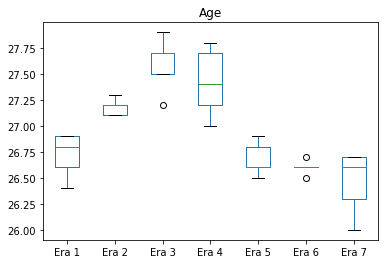

In [269]:
#Boxplots
all_seasons_df.boxplot(column=['Era 1', 'Era 2', 'Era 3', 'Era 4', 'Era 5',
                              'Era 6', 'Era 7'], grid=False)

plt.title("Age")

In [270]:
fvalue, pvalue = stats.f_oneway(all_seasons_df['Era 1'], all_seasons_df['Era 2'], all_seasons_df['Era 3'], all_seasons_df['Era 4'],
                               all_seasons_df['Era 5'], all_seasons_df['Era 6'], all_seasons_df['Era 7'])

print(fvalue, pvalue)

19.143120960295484 9.892662436708955e-09


In [271]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [272]:
d_melt = pd.melt(all_seasons_df.reset_index(), id_vars=['index'], value_vars=['Era 1', 'Era 2',
                                                                              'Era 3', 'Era 4',
                                                                             'Era 5', 'Era 6',
                                                                             'Era 7'])
# replace column names
d_melt.columns = ['index', 'eras', 'age']
# Ordinary Least Squares (OLS) model
model = ols('age ~ C(eras)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(eras),5.923429,6.0,19.143121,9.892662e-09
Residual,1.444000,28.0,NaN,NaN


In [273]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
hsd_ages = pairwise_tukeyhsd(endog=d_melt['age'], groups=d_melt['eras'], alpha=0.05)
print(hsd_ages)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Era 1  Era 2     0.46 0.0467  0.0044  0.9156   True
 Era 1  Era 3     0.88  0.001  0.4244  1.3356   True
 Era 1  Era 4      0.7  0.001  0.2444  1.1556   True
 Era 1  Era 5    -0.04    0.9 -0.4956  0.4156  False
 Era 1  Era 6    -0.12    0.9 -0.5756  0.3356  False
 Era 1  Era 7    -0.26 0.5461 -0.7156  0.1956  False
 Era 2  Era 3     0.42  0.086 -0.0356  0.8756  False
 Era 2  Era 4     0.24 0.6228 -0.2156  0.6956  False
 Era 2  Era 5     -0.5 0.0245 -0.9556 -0.0444   True
 Era 2  Era 6    -0.58 0.0062 -1.0356 -0.1244   True
 Era 2  Era 7    -0.72  0.001 -1.1756 -0.2644   True
 Era 3  Era 4    -0.18 0.8531 -0.6356  0.2756  False
 Era 3  Era 5    -0.92  0.001 -1.3756 -0.4644   True
 Era 3  Era 6     -1.0  0.001 -1.4556 -0.5444   True
 Era 3  Era 7    -1.14  0.001 -1.5956 -0.6844   True
 Era 4  Era 5    -0.74  0.001 -1.1956 -0.2844 

In [274]:
all_eras_threep = {'Era 1': [0.282, 0.282, 0.301, 0.316, 0.323], 
            'Era 2': [0.331, 0.32, 0.331, 0.336, 0.333],
           'Era 3': [0.359, 0.367, 0.36, 0.346, 0.339],
           'Era 4': [0.353, 0.354, 0.354, 0.349, 0.347],
           'Era 5': [0.356,0.358,0.358,0.362,0.367],
           'Era 6': [0.355, 0.358, 0.349, 0.359, 0.36],
           'Era 7': [0.35, 0.354, 0.358, 0.355, 0.357]}

all_threep_df = pd.DataFrame(data=all_eras_threep)
all_threep_df

,Era 1,Era 2,Era 3,Era 4,Era 5,Era 6,Era 7
0,0.282,0.331,0.359,0.353,0.356,0.355,0.350
1,0.282,0.320,0.367,0.354,0.358,0.358,0.354
2,0.301,0.331,0.360,0.354,0.358,0.349,0.358
3,0.316,0.336,0.346,0.349,0.362,0.359,0.355
4,0.323,0.333,0.339,0.347,0.367,0.360,0.357


Text(0.5,1,'Three Point %')

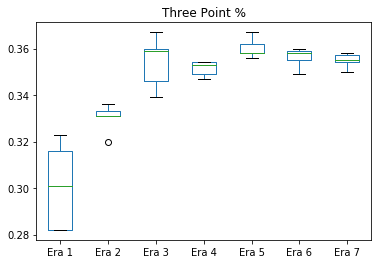

In [275]:
#Boxplots
all_threep_df.boxplot(column=['Era 1', 'Era 2', 'Era 3', 'Era 4', 'Era 5',
                              'Era 6', 'Era 7'], grid=False)

plt.title("Three Point %")

In [276]:
d_melt2 = pd.melt(all_threep_df.reset_index(), id_vars=['index'], value_vars=['Era 1', 'Era 2',
                                                                              'Era 3', 'Era 4',
                                                                             'Era 5', 'Era 6',
                                                                             'Era 7'])
# replace column names
d_melt2.columns = ['index', 'eras', 'threep']
# Ordinary Least Squares (OLS) model
model = ols('threep ~ C(eras)', data=d_melt2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(eras),0.013717,6.0,27.449628,1.677177e-10
Residual,0.002332,28.0,NaN,NaN


In [277]:
hsd_threep = pairwise_tukeyhsd(endog=d_melt2['threep'], groups=d_melt2['eras'], alpha=0.05)
print(hsd_threep)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 Era 1  Era 2   0.0294  0.001  0.0111 0.0477   True
 Era 1  Era 3   0.0534  0.001  0.0351 0.0717   True
 Era 1  Era 4   0.0506  0.001  0.0323 0.0689   True
 Era 1  Era 5   0.0594  0.001  0.0411 0.0777   True
 Era 1  Era 6   0.0554  0.001  0.0371 0.0737   True
 Era 1  Era 7    0.054  0.001  0.0357 0.0723   True
 Era 2  Era 3    0.024 0.0045  0.0057 0.0423   True
 Era 2  Era 4   0.0212 0.0154  0.0029 0.0395   True
 Era 2  Era 5     0.03  0.001  0.0117 0.0483   True
 Era 2  Era 6    0.026 0.0018  0.0077 0.0443   True
 Era 2  Era 7   0.0246 0.0035  0.0063 0.0429   True
 Era 3  Era 4  -0.0028    0.9 -0.0211 0.0155  False
 Era 3  Era 5    0.006    0.9 -0.0123 0.0243  False
 Era 3  Era 6    0.002    0.9 -0.0163 0.0203  False
 Era 3  Era 7   0.0006    0.9 -0.0177 0.0189  False
 Era 4  Era 5   0.0088 0.7035 -0.0095 0.0271  False
 Era 4  Era 

In [278]:
seasons_blk_df = averages_df[['Season', 'BLK']]
seasons_blk_df.head()

,Season,BLK
0,2019-20,4.9
1,2018-19,5.0
2,2017-18,4.8
3,2016-17,4.7
4,2015-16,5.0


In [279]:
blk_t = seasons_blk_df.T

blk_t

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
Season,2019-20,2018-19,2017-18,2016-17,2015-16,2014-15,2013-14,2012-13,2011-12,2010-11,...,1992-93,1991-92,1990-91,1989-90,1988-89,1987-88,1986-87,1985-86,1984-85,1983-84
BLK,4.9,5,4.8,4.7,5,4.8,4.7,5.1,5.1,4.9,...,5.2,5.5,5.3,5.1,5.3,5.4,5.5,5.3,5.3,5.3


In [280]:
header_row = 0

blk_t.columns = blk_t.iloc[header_row]

blk_t = blk_t.iloc[1:]
blk_t

Season,2019-20,2018-19,2017-18,2016-17,2015-16,2014-15,2013-14,2012-13,2011-12,2010-11,...,1992-93,1991-92,1990-91,1989-90,1988-89,1987-88,1986-87,1985-86,1984-85,1983-84
BLK,4.9,5,4.8,4.7,5,4.8,4.7,5.1,5.1,4.9,...,5.2,5.5,5.3,5.1,5.3,5.4,5.5,5.3,5.3,5.3


In [281]:
era1_blk = blk_t[['1984-85', '1985-86','1986-87','1987-88','1988-89']]
era1_blk_df = era1_blk.T

era2_blk = blk_t[['1989-90', '1990-91','1991-92','1992-93','1993-94']]
era2_blk_df = era2_blk.T

era3_blk = blk_t[['1994-95', '1995-96','1996-97','1997-98','1998-99']]
era3_blk_df = era3_blk.T

era4_blk = blk_t[['1999-00', '2000-01','2001-02','2002-03','2003-04']]
era4_blk_df = era4_blk.T

era5_blk = blk_t[['2004-05', '2005-06','2006-07','2007-08','2008-09']]
era5_blk_df = era5_blk.T

era6_blk = blk_t[['2009-10', '2010-11','2011-12','2012-13','2013-14']]
era6_blk_df = era6_blk.T

era7_blk = blk_t[['2014-15', '2015-16','2016-17','2018-19','2019-20']]
era7_blk_df = era7_blk.T

In [282]:
era7_blk_df

,BLK
Season,
2014-15,4.8
2015-16,5
2016-17,4.7
2018-19,5
2019-20,4.9


In [283]:
all_eras_blk = {'Era 1': [5.3, 5.3, 5.5, 5.4, 5.3], 
            'Era 2': [5.1, 5.3, 5.5, 5.2, 5.2],
           'Era 3': [5.2, 5.1, 4.9, 5.1, 5],
           'Era 4': [5.2, 5.3, 5.2, 5, 5.1],
           'Era 5': [4.9,4.7,4.6,4.7,4.8],
           'Era 6': [4.9, 4.9, 5.1, 5.1, 4.7],
           'Era 7': [4.8, 5, 4.7, 5, 4.9]}

all_blk_df = pd.DataFrame(data=all_eras_blk)
all_blk_df

,Era 1,Era 2,Era 3,Era 4,Era 5,Era 6,Era 7
0,5.3,5.1,5.2,5.2,4.9,4.9,4.8
1,5.3,5.3,5.1,5.3,4.7,4.9,5.0
2,5.5,5.5,4.9,5.2,4.6,5.1,4.7
3,5.4,5.2,5.1,5.0,4.7,5.1,5.0
4,5.3,5.2,5.0,5.1,4.8,4.7,4.9


Text(0.5,1,'Blocks')

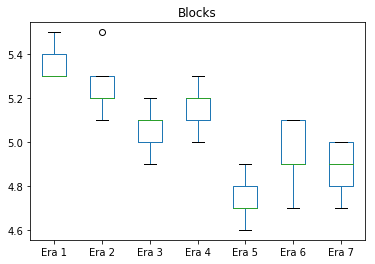

In [284]:
#Boxplots
all_blk_df.boxplot(column=['Era 1', 'Era 2', 'Era 3', 'Era 4', 'Era 5',
                              'Era 6', 'Era 7'], grid=False)

plt.title("Blocks")

In [285]:
d_melt3 = pd.melt(all_blk_df.reset_index(), id_vars=['index'], value_vars=['Era 1', 'Era 2',
                                                                              'Era 3', 'Era 4',
                                                                             'Era 5', 'Era 6',
                                                                             'Era 7'])
# replace column names
d_melt3.columns = ['index', 'eras', 'blocks']
# Ordinary Least Squares (OLS) model
model = ols('blocks ~ C(eras)', data=d_melt3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(eras),1.445714,6.0,14.666667,1.642204e-07
Residual,0.460000,28.0,NaN,NaN


In [286]:
hsd_blk = pairwise_tukeyhsd(endog=d_melt3['blocks'], groups=d_melt3['eras'], alpha=0.05)
print(hsd_blk)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Era 1  Era 2     -0.1 0.8639 -0.3571  0.1571  False
 Era 1  Era 3     -0.3 0.0144 -0.5571 -0.0429   True
 Era 1  Era 4     -0.2 0.2096 -0.4571  0.0571  False
 Era 1  Era 5    -0.62  0.001 -0.8771 -0.3629   True
 Era 1  Era 6    -0.42  0.001 -0.6771 -0.1629   True
 Era 1  Era 7    -0.48  0.001 -0.7371 -0.2229   True
 Era 2  Era 3     -0.2 0.2096 -0.4571  0.0571  False
 Era 2  Era 4     -0.1 0.8639 -0.3571  0.1571  False
 Era 2  Era 5    -0.52  0.001 -0.7771 -0.2629   True
 Era 2  Era 6    -0.32 0.0078 -0.5771 -0.0629   True
 Era 2  Era 7    -0.38 0.0011 -0.6371 -0.1229   True
 Era 3  Era 4      0.1 0.8639 -0.1571  0.3571  False
 Era 3  Era 5    -0.32 0.0078 -0.5771 -0.0629   True
 Era 3  Era 6    -0.12 0.7279 -0.3771  0.1371  False
 Era 3  Era 7    -0.18 0.3169 -0.4371  0.0771  False
 Era 4  Era 5    -0.42  0.001 -0.6771 -0.1629 

In [287]:
era1_pts = pts_t[['1984-85', '1985-86','1986-87','1987-88','1988-89']]
era1_pts_df= era1_pts.T

era2_pts = pts_t[['1989-90', '1990-91','1991-92','1992-93','1993-94']]
era2_pts_df = era2_pts.T

era3_pts = pts_t[['1994-95', '1995-96','1996-97','1997-98','1998-99']]
era3_pts_df = era3_pts.T

era4_pts = pts_t[['1999-00', '2000-01','2001-02','2002-03','2003-04']]
era4_pts_df = era4_pts.T

era5_pts = pts_t[['2004-05', '2005-06','2006-07','2007-08','2008-09']]
era5_pts_df = era5_pts.T

era6_pts = pts_t[['2009-10', '2010-11','2011-12','2012-13','2013-14']]
era6_pts_df = era6_pts.T

era7_pts = pts_t[['2014-15', '2015-16','2016-17','2018-19','2019-20']]
era7_pts_df = era7_pts.T

In [288]:
era7_pts_df

,PTS
Season,
2014-15,100
2015-16,102.7
2016-17,105.6
2018-19,111.2
2019-20,111.4


In [289]:
all_eras_pts = {'Era 1': [110.8, 110.2, 109.9, 108.2, 109.2], 
            'Era 2': [107, 106.3, 105.3, 105.3, 101.5],
           'Era 3': [101.4, 99.5, 96.9, 95.6, 91.6],
           'Era 4': [97.5, 94.8, 95.5, 95.1, 93.4],
           'Era 5': [97.2,97,98.7,99.9,100],
           'Era 6': [100.4, 99.6, 96.3, 98.1, 101],
           'Era 7': [100, 102.7, 105.6, 111.2, 111.4]}

all_pts_df = pd.DataFrame(data=all_eras_pts)
all_pts_df

,Era 1,Era 2,Era 3,Era 4,Era 5,Era 6,Era 7
0,110.8,107.0,101.4,97.5,97.2,100.4,100.0
1,110.2,106.3,99.5,94.8,97.0,99.6,102.7
2,109.9,105.3,96.9,95.5,98.7,96.3,105.6
3,108.2,105.3,95.6,95.1,99.9,98.1,111.2
4,109.2,101.5,91.6,93.4,100.0,101.0,111.4


Text(0.5,1,'Points')

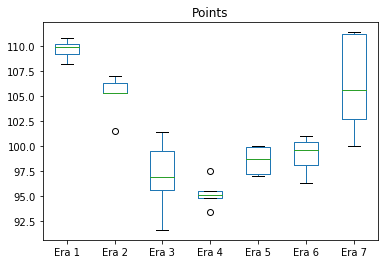

In [290]:
#Boxplots
all_pts_df.boxplot(column=['Era 1', 'Era 2', 'Era 3', 'Era 4', 'Era 5',
                              'Era 6', 'Era 7'], grid=False)

plt.title("Points")

In [291]:
d_melt4 = pd.melt(all_pts_df.reset_index(), id_vars=['index'], value_vars=['Era 1', 'Era 2',
                                                                              'Era 3', 'Era 4',
                                                                             'Era 5', 'Era 6',
                                                                             'Era 7'])
# replace column names
d_melt4.columns = ['index', 'eras', 'points']
# Ordinary Least Squares (OLS) model
model = ols('points ~ C(eras)', data=d_melt4).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(eras),874.886857,6.0,19.146527,9.873505e-09
Residual,213.240000,28.0,NaN,NaN


In [292]:
hsd_pts = pairwise_tukeyhsd(endog=d_melt4['points'], groups=d_melt4['eras'], alpha=0.05)
print(hsd_pts)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 Era 1  Era 2    -4.58 0.1569 -10.1164  0.9564  False
 Era 1  Era 3   -12.66  0.001 -18.1964 -7.1236   True
 Era 1  Era 4    -14.4  0.001 -19.9364 -8.8636   True
 Era 1  Era 5    -11.1  0.001 -16.6364 -5.5636   True
 Era 1  Era 6   -10.58  0.001 -16.1164 -5.0436   True
 Era 1  Era 7    -3.48 0.4424  -9.0164  2.0564  False
 Era 2  Era 3    -8.08 0.0013 -13.6164 -2.5436   True
 Era 2  Era 4    -9.82  0.001 -15.3564 -4.2836   True
 Era 2  Era 5    -6.52 0.0132 -12.0564 -0.9836   True
 Era 2  Era 6     -6.0 0.0271 -11.5364 -0.4636   True
 Era 2  Era 7      1.1    0.9  -4.4364  6.6364  False
 Era 3  Era 4    -1.74    0.9  -7.2764  3.7964  False
 Era 3  Era 5     1.56    0.9  -3.9764  7.0964  False
 Era 3  Era 6     2.08  0.887  -3.4564  7.6164  False
 Era 3  Era 7     9.18  0.001   3.6436 14.7164   True
 Era 4  Era 5      3.3 0.501